In [3]:
import pandas as pd

col_list = ['A' + str(i) for i in range(1, 17)] # assign headers(columns names) to the dataset

# import the data set from archive and assign the header 
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", header=None, names=col_list) # import the data set

df.head() # quick look at the dataset including the header 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [380]:
# cleaning the data and prepar it 

for col_name in df.columns:   # loop over al the columns 
    col = df[col_name]
    miss = col.isnull().sum() # count how many values are missing 
    if miss > 0:              # if more than one value is missning 
        col.fillna(col.mode()[0], inplace = True) # replace missing values with the mode of that column 

In [ ]:
# other problem this dataset have is some of the values are '?' so we have to deal with it



In [381]:

df = df.replace(['?'], method='bfill') # replace '?' values with next value

In [382]:
df.to_csv('clean_crx.csv', index=False) 
df = pd.read_csv('clean_crx.csv') 

In [383]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus


X = df[df.columns[0:-1]]
X = pd.get_dummies(X)
y = df.A16

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

Depth, Criteria, Accuracy_score
1      entropy      0.8115942028985508
2      entropy      0.8115942028985508
3      entropy      0.7971014492753623
4      entropy      0.8115942028985508
1      gini      0.8115942028985508
2      gini      0.8115942028985508
3      gini      0.7971014492753623
4      gini      0.8043478260869565


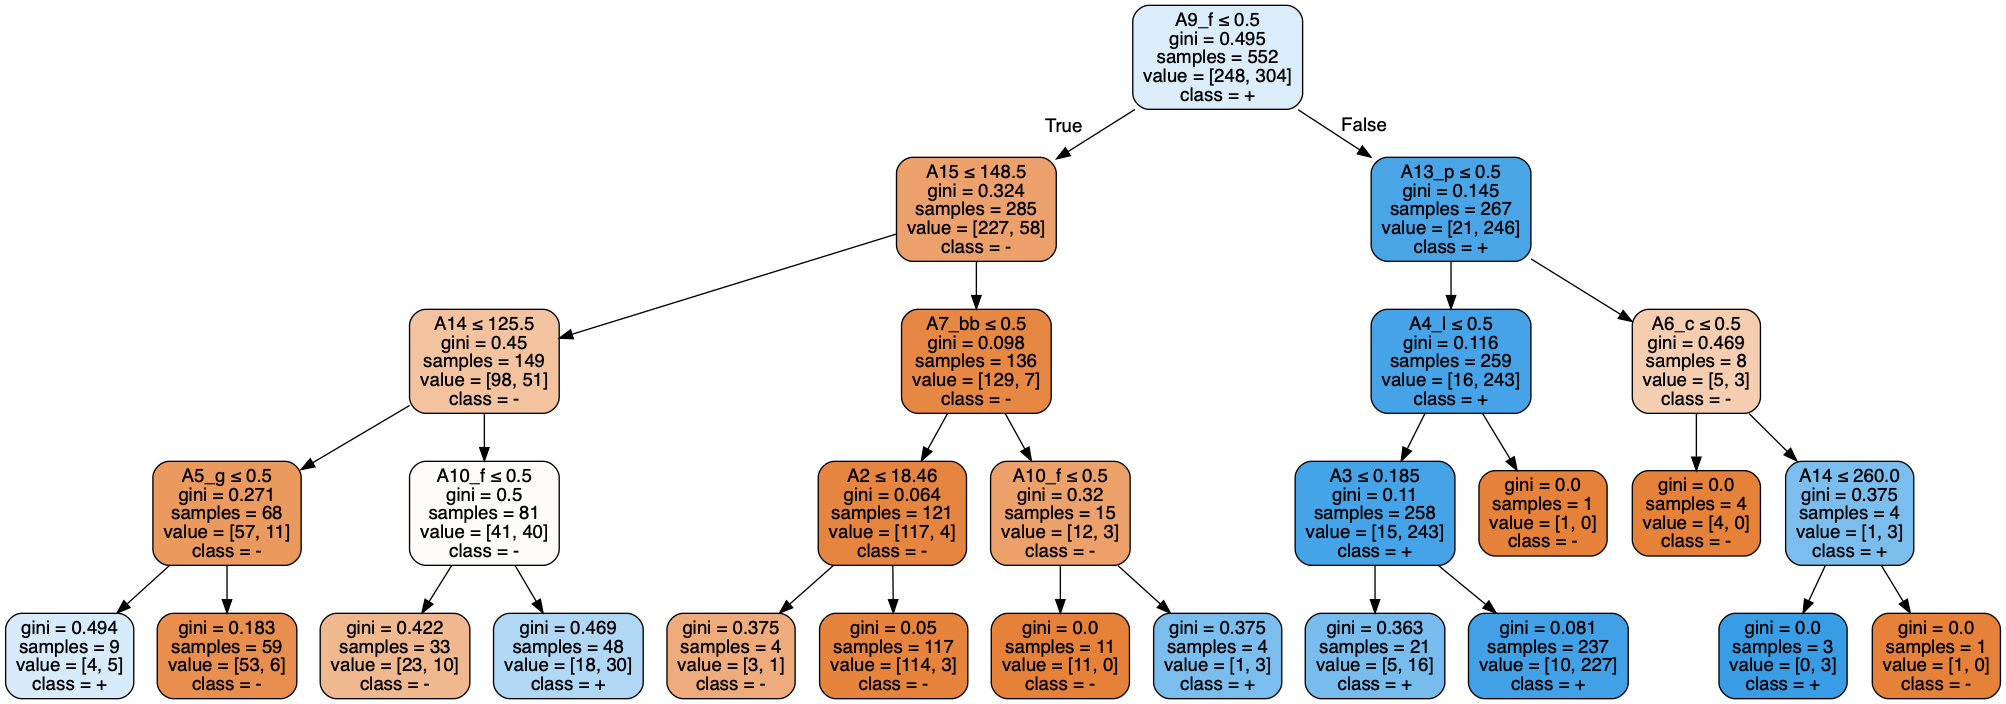

In [385]:
criteria = ["entropy", "gini"]

print('Depth, Criteria, Accuracy_score')
# n = 1
for crt in criteria:
    for depth in range(1,5):
        dt = DecisionTreeClassifier(max_depth=depth, criterion=crt)
        dt.fit(X_train, y_train) 
        y_predicted = dt.predict(X_test) 
        accuracy = metrics.accuracy_score(y_test,y_predicted) 
        print(depth, '    ', crt , '    ', str(accuracy))
#         dot_data = StringIO()
#         export_graphviz(dt, out_file=dot_data,  
#                         filled=True, rounded=True,
#                         special_characters=True,feature_names = X.columns,class_names=list(set(y)))
#         graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#         graph.write_png(f'Max_depth_none_Criterion_gini{n}.png')
#         n += 1
Image(graph.create_png())